## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

--2020-10-22 00:02:01--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Łączenie się z raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 263224 (257K) [image/bmp]
Zapis do: `jet.bmp'

jet.bmp             100%[===================>] 257,05K  --.-KB/s    w 0,1s     

2020-10-22 00:02:01 (2,13 MB/s) - zapisano `jet.bmp' [263224/263224]



(-0.5, 511.5, 511.5, -0.5)

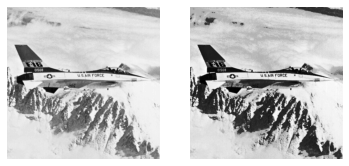

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate

img = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img],[0],None,[256], [0, 256])
holder = int(cv2.mean(img)[0])
bigger_hist = hist[np.where(hist > holder)]
smaller_hist = hist[np.where(hist <= holder)]

big_hist_cumsum = bigger_hist.cumsum()
small_hist_cumsum = smaller_hist.cumsum()

C1 = big_hist_cumsum / big_hist_cumsum.max()
C2 = small_hist_cumsum / small_hist_cumsum.max()

C1 = C1 * holder
C2 = ((255 - holder - 1) * C2) + holder + 1
C = np.concatenate((C1, C2))


f, a = plt.subplots(1,2)

a[0].imshow(img, 'gray')
a[0].axis('off')

a[1].imshow(cv2.LUT(img, C), 'gray')
a[1].axis('off')

(-0.5, 511.5, 511.5, -0.5)

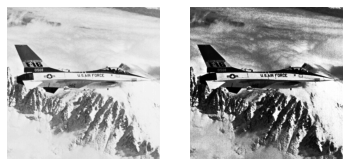

In [2]:
img2 = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img2], [0], None, [256], [0,256])

hist_cumsum = hist.cumsum()
hist_cumsum_S = ((hist_cumsum - hist_cumsum.min()) * 255) / (hist_cumsum.max() - hist_cumsum.min())

image_LUT_processed = cv2.LUT(img2, hist_cumsum_S)

f, a = plt.subplots(1,2)
a[0].imshow(img2, 'gray')
a[0].axis('off')
a[1].imshow(image_LUT_processed, 'gray')
a[1].axis('off')
